## Global descriptors

| name  | description   |
|:-:|:-:|
|n_pairs| Number of pairs |
|n_st   | Number of stations |
|hh     | Time of day (0. - 24.)|
|doy    | Time of year (1-365)|
|el     | Elevation in degrees |
|grad   | Maximum gradient |



## Individual curve descriptors

### Delay descriptors


| name  | description  | normalization  |
|:-:|:-:|:-:|
|i_range| Maximum phase delay minus Minimum phase delay||
|i_outf_ma| Outlier factor from Moving Average method||
|i_outf_pf| Outlier factor from Polynomial fit method||
|n| Number of epochs ||
|nr| Number of epochs / Max number of epochs for the event||
|sroti  | Scintillation index: a ROTI-like indicator: get_sroti(data) |   |


### First difference descriptors

**diff**: for each station, array containing the difference between consecutive phase delay values station

| name  | description  | normalization |
|:-:|:-:|:-:|
|d_max  | Maximum diff value during all the event |   |
|d_outliers| Number of diff points out of +/- 2 sigma | |
|d_outliers_bin  | Binary for diff values out of +/- 2 sigma |   |
|d_var| diff variance during all the event| |
 	 	 	 	 	 	 	 	 	 	

## Aggregated descriptors

**diff**: for each station, array containing the difference between consecutive phase delay values station

| name | description | normalization/aggregation |
| :-:|:-:|:-: |
| d_max_diff | *Maximum diff value* difference between two largest stations  | max - max_2  |
| d_max_std | Maximum diff value during all the event |  std |
| d_outliers | Number of diff points out of +/- 2*sigma* | sum |
| d_outliers_bin | Binary for diff values out of +/- 2*sigma* | sum  |
| d_var | diff variance during all the event| std |
| n | Number of epochs |  sum |
| n_low | Number of stations with fewer than L/2 observations, where L is the max number of observations possible| NA |
| n_low_r | Fractional Number of stations with fewer than L/2 observations, where L is the max number of observations possible. The fraction is calculated w.r.t. the number of stations| NA |
| n_st | Number of stations| NA |
| nr | Number of epochs / Max number of epochs for the event| sum |
| i_outf_ma | Outlier factor from Moving Average method| std |
| i_outf_pf | Outlier factor from Polynomial fit method| std |
| i_range | Maximum phase delay minus Minimum phase delay| std |
| sm_mean | Mean similitude between pairs of stations data (three lower similarities)| NA |
| sm_std | Standard deviation of similitude indicator between station pairs| NA |
| sroti_max | Max of Scintillation index, a ROTI-like indicator: get_sroti(data) |  max |
| sroti_mean | Mean of Scintillation index, a ROTI-like indicator: get_sroti(data) | mean  |
| sroti_std | Standard Deviation of Scintillation index, a ROTI-like indicator: get_sroti(data) | std  |
| doy | Day of year | Divided by 365 |
| el | Elevation |Divided by 90|
| grad | Gradient value reported |Divided by 100|
| hh | Hour of occurrence |Divided by 24|
| n_pairs | Number of station pairs | NA |


## Single delay curve Time series descriptors

The time series descriptors are presented this way:

**station -> time_slot -> descriptors**

So, this is a cube of dimension n_stations x n_time_slots x n_features. For each station / time_slot, it is defined:

| name  | description  | values  |
|:-:|:-:|:-:|
|d_kur| diff kurtosis during the time window||
|d_max  | Maximum diff value during during the time window |   |
|d_ske| diff skewness during the time window||
|d_var| diff variance during the time window||
|d_outliers| Number of diff points out of +/- 2*sigma* during the time window. *sigma* is calculated for all the event  ||
| d_outliers_bin  | Binary for diff values out of +/- 2*sigma* during the time window. *sigma* is calculated for all the event   |   |
|i_range| Maximum phase delay minus Minimum phase delay during the time window||
| n| Number of epochs during the time window||
| n_i_out_ma  | Number of outliers in phase delay with the moving average method |   |
| n_i_out_pf  | Number of outliers in phase delay with the polyfit method   |   |
| nr| Number of epochs / Max number of epochs for the event||
| sroti  | Scintillation index: a ROTI-like indicator: get_sroti(data) |   |


In [1]:
from plotly.offline import init_notebook_mode
from descriptors import *
from utils_ml import *
init_notebook_mode()
%matplotlib inline
%load_ext autoreload
%autoreload 2

/usr/local/lib/python2.7/dist-packages/sklearn/cross_validation.py:44: DeprecationWarning:

This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.



In [2]:
year = 2013
Plots_folder = "/mnt/gnss/data/regme/Plots_regme/PlotsCorr"+str(year)

In [3]:
hdf = HDFStore('/mnt/gnss/data/regme/gradients/data2013.h5')
event  = hdf["event"]
curve  = hdf["gradient"]
detail = hdf["detail"]
hdf.close()

In [4]:
event.shape, curve.shape, detail.shape

((6529, 14), (81603, 15), (9242323, 14))

In [5]:
#ev_class = pd.read_csv("data/ev_types.csv")
ev_class = pd.read_csv("data/events_classes_July20th.csv")
print ev_class.shape
ev_class.head()


(401, 3)


eid valid_event scint
0   12        True  True
1   13        True  True
2   45        True  True
3   46        True  True
4   64        True  True

### Check an event

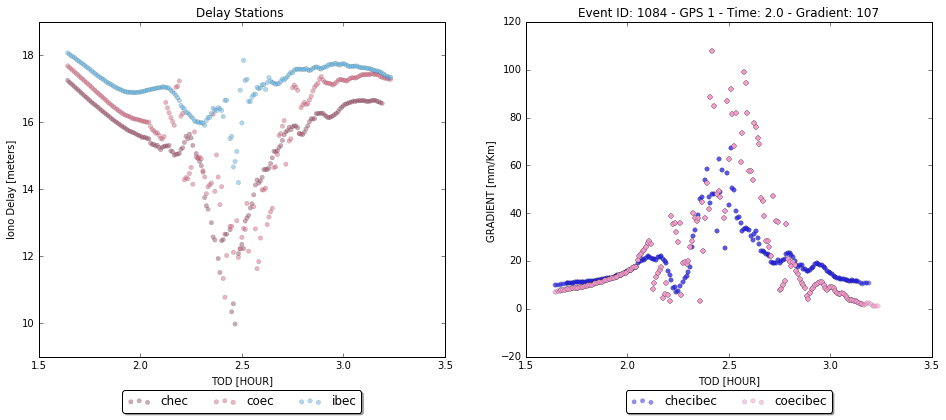

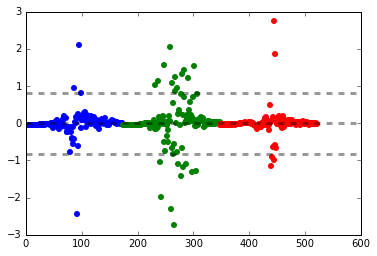

In [6]:
inspect_event(event, curve, detail, 1084,  Plots_folder) #384
res = analyze_set(event, curve, detail, 1084, Plots_folder, tw = 6, plot=False)
tsd = res[1]
plot_data = []
columns = tsd.columns.difference(["station","time_slot"])
columns = ["d_max","n_out_ma","n_out_pf","i_range","d_outliers","d_outliers_bin"]
for st in tsd.station.unique():
    d  = tsd[tsd.station==st]
    plot_data += [ go.Scatter(x=range(d.time_slot.unique().shape[0]), y=d[column].values, 
                         name=column+" "+st, mode="markers+lines", opacity=.5) 
             for column in columns]
iplot(go.Figure(data=plot_data)) 



### Create dataframe with descriptors for each event

In [7]:
-

Tue Oct 18 07:07:57 2016
event id: 12 , is valid: True
event id: 13 , is valid: True
event id: 45 , is valid: True
event id: 46 , is valid: True
event id: 64 , is valid: True
event id: 65 , is valid: True
event id: 75 , is valid: False
event id: 76 , is valid: False
event id: 87 , is valid: True
event id: 88 , is valid: False
event id: 96 , is valid: False
event id: 117 , is valid: True
event id: 120 , is valid: True
event id: 122 , is valid: False
event id: 129 , is valid: False
event id: 133 , is valid: True
event id: 134 , is valid: True
event id: 137 , is valid: True
event id: 138 , is valid: True
event id: 139 , is valid: True
event id: 140 , is valid: False
event id: 141 , is valid: True
event id: 142 , is valid: True
event id: 144 , is valid: True
event id: 145 , is valid: True
event id: 169 , is valid: False
event id: 170 , is valid: True
event id: 171 , is valid: True
event id: 172 , is valid: False
event id: 182 , is valid: True
event id: 188 , is valid: True
event id: 189 , 

In [8]:
data.shape, ts_data.shape

((401, 25), (401,))

In [9]:
event.ix[5233]["PAIRS"]#[event.N_PAIRS>20]

"['alec cuec' 'alec erec' 'alec maec' 'alec riop' 'chec ibec' 'chec quem'\n 'clec ljec' 'clec mhec' 'coec ibec' 'cuec gzec' 'cuec njec' 'erec maec'\n 'erec prec' 'gyec njec' 'gyec pjec' 'gzec ljec' 'ibec quem' 'ljec pdec'\n 'maec prec' 'maec riop' 'mhec njec' 'pjec seec' 'prec riop']"

In [10]:
print "Total time:", end - start

Total time: 474.791566133


In [11]:
data_ori = data.copy()
data_ori.describe()
#data = data_ori.copy()
data.describe()

eid  d_max_diff   d_max_std  d_outliers  d_outliers_bin  \
count   401.000000  401.000000  401.000000  401.000000      401.000000   
mean   1337.573566    0.617696    0.420242    2.507426        3.094763   
std    1844.569602    0.356732    0.142730    2.162110        2.985129   
min       0.000000    0.003497    0.029155    1.000000        1.000000   
25%     124.000000    0.269655    0.285850    1.000000        1.000000   
50%     269.000000    0.741530    0.475550    1.630930        2.000000   
75%    2005.000000    0.968348    0.555213    3.261860        4.000000   
max    6499.000000    0.997813    0.576130   12.833437       18.000000   

            d_var   i_outf_ma   i_outf_pf     i_range           n     ...      \
count  401.000000  401.000000  401.000000  401.000000  401.000000     ...       
mean     0.414104    0.419335    0.421313    0.281205    2.678886     ...       
std      0.149195    0.136152    0.147467    0.133773    2.006464     ...       
min      0.056954    0.027197    0.067270    0.025420    0.150000     ...       
25%      0.276416    0.294324    0.277207    0.172450    1.500000     ...       
50%      0.470656    0.461963    0.479249    0.270113    1.994444     ...       
75%      0.550690    0.544181    0.557087    0.386075    3.272222     ...       
max      0.576351    0.576181    0.576554    0.564630   13.783333     ...       

           sm_std   sroti_max  sroti_mean   sroti_std         doy          el  \
count  401.000000  401.000000  401.000000  401.000000  401.000000  401.000000   
mean     1.903767    3.953696    1.611406    1.771171    0.193072    0.146445   
std      1.677902    3.156303    1.043660    1.684667    0.286296    0.127148   
min      0.075465    0.011944    0.011227    0.000715    0.002740    0.018484   
25%      0.818018    1.981771    0.820144    0.698910    0.019178    0.077432   
50%      1.424779    3.193525    1.440326    1.268806    0.030137    0.102957   
75%      2.320902    4.673030    2.223245    2.082140    0.227397    0.152126   
max     11.294265   21.206838    6.247591   10.449715    0.991781    0.883308   

             grad          hh     n_pairs       label  
count  401.000000  401.000000  401.000000  401.000000  
mean     1.085655    0.389859    3.221945    0.246883  
std      0.610992    0.338438    2.343740    0.431737  
min      0.503815    0.000000    2.000000    0.000000  
25%      0.687859    0.083333    2.000000    0.000000  
50%      0.890691    0.208333    2.000000    0.000000  
75%      1.270959    0.729167    3.000000    0.000000  
max      4.367124    0.979167   21.000000    1.000000  

[8 rows x 25 columns]

In [12]:
for col in data.columns:
    print col, "\t\t", data[col].describe()["std"]

eid 		1844.56960161
d_max_diff 		0.356732087194
d_max_std 		0.1427301639
d_outliers 		2.16211034823
d_outliers_bin 		2.98512939522
d_var 		0.149194828081
i_outf_ma 		0.136151743113
i_outf_pf 		0.14746725662
i_range 		0.133773488598
n 		2.00646436088
n_low 		2.51719027544
n_low_r 		0.0
n_st 		2.51719027544
nr 		2.06148161143
sm_mean 		2.62605577625
sm_std 		1.67790176582
sroti_max 		3.15630344055
sroti_mean 		1.04365972605
sroti_std 		1.68466717732
doy 		0.286296451429
el 		0.127148498515
grad 		0.610992412138
hh 		0.338437515951
n_pairs 		2.34374000413
label 		0.431736619628


In [13]:
%autoreload 2
from utils_ml import *
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from sklearn.pipeline import make_pipeline
#from sklearn.ensemble import VotingClassifier
#from sklearn.calibration import calibration_curve

In [14]:
data = data_ori.copy()
#data = data.drop(183)
data.shape

(401, 25)

### Naive bayes classifier

In [18]:
train.columns

Index([u'eid', u'd_max_diff', u'd_max_std', u'd_outliers', u'd_outliers_bin',
       u'd_var', u'i_outf_ma', u'i_outf_pf', u'i_range', u'n', u'n_low',
       u'n_low_r', u'n_st', u'nr', u'sm_mean', u'sm_std', u'sroti_max',
       u'sroti_mean', u'sroti_std', u'doy', u'el', u'grad', u'hh', u'n_pairs',
       u'label'],
      dtype='object')

In [19]:
train, test = train_test_split(data, test_size=.3)
train, test = train.as_matrix(), test.as_matrix()
train_ind, test_ind = train[:,0], test[:,0]
train_target, test_target  = train[:,-1], test[:,-1]
train, test = train[:,1:-1], test[:,1:-1]
train_mean, train_std = train.mean(axis=0), train.std(axis=0,ddof=1)
train_std[train_std==0] = 1
train = (train - train_mean) / train_std
test  = (test  - train_mean) / train_std

Number of mislabeled points out of a total 280 points : 23


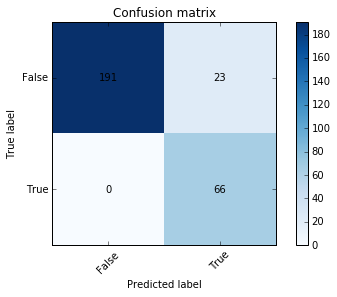

In [35]:
gnb = GaussianNB()
model = gnb.fit(train, train_target)
y_pred = model.predict(train)
print("Number of mislabeled points out of a total %d points : %d" % (train.shape[0],(train_target != y_pred).sum()))
a = np.array(train_target,dtype="b")
b = np.array(y_pred,dtype="b")
cm = confusion_matrix(a,b,labels=[0,1])
plot_confusion_matrix(cm, ["False","True"])

In [36]:
train_ind[y_pred != train_target], train_target[y_pred != train_target]

(array([  129.,    75.,    76.,   183.,  5188.,  4899.,   167.,  1588.,
          122.,  1088.,  1021.,  5788.,  1899.,    96.,    88.,  2688.,
           88.,   121.,  5988.,   282.,   169.,  5388.,  5399.]),
 array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]))

Number of mislabeled points out of a total 121 points : 3


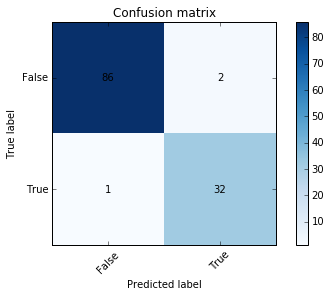

In [37]:
y_pred = model.predict(test)
print("Number of mislabeled points out of a total %d points : %d" % (test.shape[0],(test_target != y_pred).sum()))
a = np.array(test_target,dtype="b")
b = np.array(y_pred,dtype="b")
cm = confusion_matrix(a,b,labels=[0,1])
plot_confusion_matrix(cm, ["False","True"])

In [39]:
test_ind[y_pred != test_target], test_target[y_pred != test_target]

(array([ 5899.,  1020.,   130.]), array([ 0.,  0.,  1.]))

### Clustering

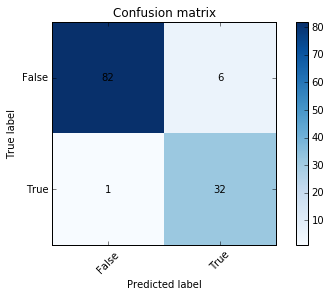

In [40]:
k=2

model = KMeans(n_clusters=k)
model.fit(train)

y_pred = model.predict(test)
a = np.array(test_target,dtype="b")
b = np.array(y_pred,dtype="b")
cm = confusion_matrix(a,b,labels=[0,1])
plot_confusion_matrix(cm, ["False","True"])

In [41]:
from sklearn.ensemble import RandomForestClassifier

Number of mislabeled points out of a total 280 points : 1


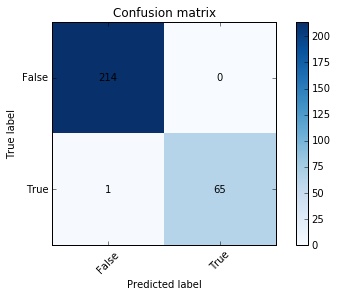

In [42]:
rfc = RandomForestClassifier(n_estimators=10,random_state=123)
model = rfc.fit(train, train_target)
y_pred = model.predict(train)
print("Number of mislabeled points out of a total %d points : %d" % (train.shape[0],(train_target != y_pred).sum()))
a = np.array(train_target,dtype="b")
b = np.array(y_pred,dtype="b")
cm = confusion_matrix(a,b,labels=[0,1])
plot_confusion_matrix(cm, ["False","True"])

Number of mislabeled points out of a total 121 points : 6


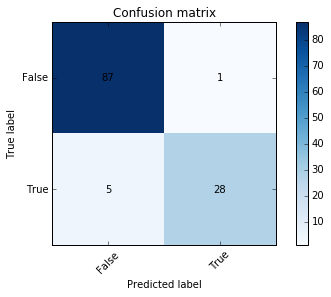

In [43]:
y_pred = model.predict(test)
print("Number of mislabeled points out of a total %d points : %d" % (test.shape[0],(test_target != y_pred).sum()))
a = np.array(test_target,dtype="b")
b = np.array(y_pred,dtype="b")
cm = confusion_matrix(a,b,labels=[0,1])
plot_confusion_matrix(cm, ["False","True"])

In [44]:
ml_col = []
for col in data.columns:
    #if data[col].std()==0: continue
    #if ((col == "eid") | (col == "label")): continue
    ml_col += [col]


In [45]:
fi = pd.DataFrame( {"col": ml_col[1:-1], "feat_imp": model.feature_importances_} )
fi.sort_values(by="feat_imp",ascending=False).head()

col  feat_imp
6    i_outf_pf  0.325000
5    i_outf_ma  0.100028
19          el  0.097479
1    d_max_std  0.081747
2   d_outliers  0.071906

## Brief PCA analysis

In [42]:
pca = PCA(5)

In [43]:
pca.fit(train)

PCA(copy=True, n_components=5, whiten=False)

In [44]:
pc = pca.components_
pc.shape

(5, 23)

In [45]:
fi = pd.DataFrame( {"col": ml_col[1:-1], 
                    "pc1": pc[0,:],
                    "pc2": pc[1,:],
                    "pc3": pc[2,:],
                    "pc4": pc[3,:],
                    "pc5": pc[4,:]
                   } )
fi.sort_values(by="pc1",ascending=False)

col           pc1           pc2           pc3       pc4  \
6        i_outf_pf  2.716889e-01 -7.155255e-03  2.687957e-01  0.058707   
4            d_var  2.698407e-01  1.120925e-02  2.662378e-01  0.054657   
1        d_max_std  2.694401e-01  1.779670e-04  2.649416e-01  0.048172   
5        i_outf_ma  2.682148e-01 -3.643100e-03  2.626308e-01  0.018415   
0       d_max_diff  2.413391e-01  2.165537e-02  2.788204e-01  0.050232   
7          i_range  1.866724e-01  1.095662e-01  1.669282e-01  0.001286   
14          sm_std  1.768606e-01  3.450266e-01 -5.734158e-02 -0.019867   
21              hh  1.734473e-01 -2.183359e-02  2.703176e-01 -0.191440   
17       sroti_std  1.527865e-01  3.728558e-01 -1.196990e-01 -0.034870   
13         sm_mean  9.451130e-02  3.941016e-01 -7.850801e-02  0.043171   
15       sroti_max  8.361603e-02  4.173201e-01 -1.529020e-01 -0.007143   
20            grad  8.334067e-02  3.113328e-01 -7.135377e-03 -0.193118   
10         n_low_r  1.009742e-28 -3.308722e-24  3.388132e-21  0.000000   
16      sroti_mean -1.323302e-03  3.930089e-01 -2.532551e-01 -0.030004   
18             doy -8.065466e-02  7.795173e-03  1.686832e-01 -0.920048   
19              el -1.566809e-01 -8.409094e-02 -1.550154e-01 -0.180125   
22         n_pairs -2.343626e-01  1.712131e-01  3.269209e-01  0.074305   
8                n -2.537832e-01  1.131636e-01  1.713582e-01  0.022331   
9            n_low -2.551782e-01  1.685131e-01  2.653233e-01  0.094109   
11            n_st -2.551782e-01  1.685131e-01  2.653233e-01  0.094109   
12              nr -2.589089e-01  1.457414e-01  2.566852e-01  0.070795   
3   d_outliers_bin -2.832458e-01  1.033491e-01  1.340420e-01  0.033406   
2       d_outliers -2.833451e-01  9.985752e-02  1.195832e-01  0.034900   

         pc5  
6   0.032176  
4   0.093142  
1   0.136306  
5   0.076540  
0   0.240809  
7  -0.039233  
14  0.178820  
21 -0.213951  
17  0.091665  
13  0.055028  
15  0.005183  
20  0.008948  
10  0.000000  
16 -0.190065  
18 -0.088593  
19  0.823006  
22  0.001528  
8   0.286083  
9  -0.039890  
11 -0.039890  
12  0.057437  
3  -0.078453  
2  -0.035219

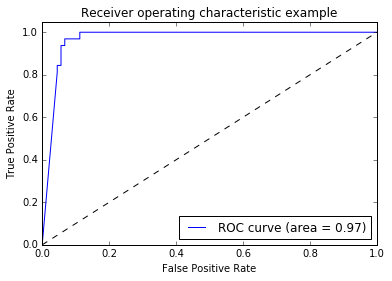

In [46]:
classifier = gnb
y_score = classifier.fit(train, train_target).predict_proba(test)
# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(test_target, y_score[:, 1])
roc_auc = auc(fpr, tpr)
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

# Classiffiers Performance 

We evaluate the classificator with the standard metrics. In this particular problem, it's very very important to have *ZERO False Negatives*. The metrics are:

Symbol  | Description              | Formula              | Comments
------- | ------------------------ | -------------------- |
$$TP$$  | True positives           |                      |
$$FP$$  | False positives          |                      |
$$TN$$  | True negatives           |                      |
$$FN$$  | False negatives          | Values classified negative, actually positive |
$$FPR$$ | False Positives Rate     | $${FP}/{(TN+FP)}$$ |
$$FNR$$ | **False Negatives Rate** | $${FN}/{(TP+FN)}$$ |Should be zero / near to zero
pre     | Precision                | $${FN}/{(TP+FN)}$$ |
sen     | **Sensitivity**          | $${TP}/{(TP+FN)}$$ | Its equal to $$1-FNR$$
spec    | Specificity              | $${TN}/{(TN+FP)}$$ |


In [46]:
ts_data = np.array(ts_data)
tsv = np.zeros((0,len(ts_data[0])))
lon = len(ts_data[0])
c=0
for row in ts_data:
    if len(row) <> lon:
        continue
    lon = len(row)
    tsv = np.vstack((tsv,row))
    c+=1
tsv = pd.DataFrame(tsv)
tsv.dropna(axis=1,inplace=True)
tsv.shape

(400, 2267)

In [47]:
data = data.drop_duplicates()
tsv = tsv.drop_duplicates()
data.shape, tsv.shape

((393, 25), (392, 2267))

In [48]:
#tsv = tsv.drop(183)
dataset = data.merge(tsv,left_on=["eid"],right_on=[0],how="inner")
tsv.shape, data.shape, dataset.shape
#dataset.eid.value_counts().head()

((392, 2267), (393, 25), (392, 2292))

### Training without time series data as features

In [50]:
tdata = pd.DataFrame(np.column_stack((data["eid"],data[data.columns.difference(["eid","label"])],data["label"])))
#tdata.dropna(axis=1,inplace=True)

ml_col = []
for col in tdata.columns:
    if tdata[col].std()==0: continue
    if ((col == "eid") | (col == "label")): continue
    ml_col += [col]
tdata = tdata[ml_col]
lr  = LogisticRegression()
gnb = GaussianNB()
svc = LinearSVC(C=1.0)
rfc = RandomForestClassifier(n_estimators=100)
models = [(lr,  "Logistic Regression", "lr"),            (gnb, "Naive Bayes", "gnb"),
          (svc, "Support Vector Classification", "svc"), (rfc, "Random Forest", "rfc")]
stats = get_classifier_stats(tdata, models, n=100)
stats_c1 = stats
stats

Dataset size: train: 275 , test: 118
Progress %: 0 10 20 30 40 50 60 70 80 90

fp              fn                 fpr                  fnr  \
       mean       std  mean       std      mean       std       mean   
model                                                                  
gnb    7.54  2.418030  0.32  0.468826  8.408560  2.620193   1.103909   
lr     3.66  2.041093  2.88  1.913693  4.078459  2.228425  10.039465   
rfc    4.13  2.209507  3.19  1.921148  4.592113  2.392743  11.191055   
svc    3.99  2.280772  3.73  2.073668  4.436719  2.487239  12.972283   

                       pre                  sen                  spe            
            std       mean       std       mean       std       mean       std  
model                                                                           
gnb    1.643990  78.851073  6.282548  98.896091  1.643990  91.591440  2.620193  
lr     6.475162  87.676335  6.132232  89.960535  6.475162  95.921541  2.228425  
rfc    6.485429  86.066288  6.931341  88.808945  6.485429  95.407887  2.392743  
svc    6.646551  86.287857  6.874955  87.027717  6.646551  95.563281  2.487239

### Now with PCA

In [51]:
stats = get_classifier_stats(tdata, models, n=100, pca=True)
stats_c2 = stats
stats

Dataset size: train: 275 , test: 118
Progress %: 0 10 20 30 40 50 60 70 80 90

fp              fn                 fpr                 fnr            \
       mean       std  mean       std      mean       std      mean       std   
model                                                                           
gnb    6.84  2.533493  0.82  0.925290  7.637391  2.732444  2.807231  2.983261   
lr     3.78  1.654989  2.21  1.552417  4.215966  1.805085  7.535103  5.055683   
rfc    4.40  1.901621  2.85  2.041860  4.908820  2.064431  9.696837  6.574708   
svc    3.63  1.554758  2.90  1.925375  4.046258  1.682035  9.901467  6.246512   

             pre                  sen                  spe            
            mean       std       mean       std       mean       std  
model                                                                 
gnb    80.436226  6.647881  97.192769  2.983261  92.362609  2.732444  
lr     87.545642  5.274990  92.464897  5.055683  95.784034  1.805085  
rfc    85.592994  5.738913  90.303163  6.574708  95.091180  2.064431  
svc    87.660905  5.258817  90.098533  6.246512  95.953742  1.682035

### Training with time series data as features

In [50]:
tdata = pd.DataFrame(np.column_stack((dataset["eid"],dataset[dataset.columns.difference(["eid","label"])],dataset["label"])))
tdata.dropna(axis=1,inplace=True)
ml_col = []
for col in tdata.columns:
    if tdata[col].std()==0: continue
    if ((col == "eid") | (col == "label")): continue
    ml_col += [col]
tdata = tdata[ml_col]
lr  = LogisticRegression()
gnb = GaussianNB()
svc = LinearSVC(C=1.0)
rfc = RandomForestClassifier(n_estimators=100)
models = [(lr,  "Logistic Regression", "lr"),            (gnb, "Naive Bayes", "gnb"),
          (svc, "Support Vector Classification", "svc"), (rfc, "Random Forest", "rfc")]
# Sample the dataset with replacement "n" times. Each time, 
# split train/test and generate all models. Stats are over the 
# n datasets
stats = get_classifier_stats(tdata, models, n=100)
stats_c3 = stats
stats

 Dataset size: train: 274 , test: 118
Progress %: 0 10 20 30 40 50 60 70 80 90

fp              fn                 fpr                  fnr  \
       mean       std  mean       std      mean       std       mean   
model                                                                  
gnb    2.61  1.669059  0.46  0.821676  2.915716  1.847702   1.606285   
lr     4.70  1.914854  3.22  2.101370  5.254936  2.135443  11.166298   
rfc    3.12  1.571720  2.30  1.800673  3.481323  1.741852   7.959280   
svc    4.31  1.673893  2.82  2.011984  4.814368  1.856230   9.798256   

                       pre                  sen                  spe            
            std       mean       std       mean       std       mean       std  
model                                                                           
gnb    2.938938  91.613731  5.199768  98.393715  2.938938  97.084284  1.847702  
lr     6.746006  84.414459  5.863504  88.833702  6.746006  94.745064  2.135443  
rfc    5.897590  89.365166  5.231077  92.040720  5.897590  96.518677  1.741852  
svc    6.469523  85.570464  5.496514  90.201744  6.469523  95.185632  1.856230

### And with PCA

In [53]:
stats = get_classifier_stats(tdata, models, n=100, pca=True)
stats_c4 = stats
stats

Dataset size: train: 274 , test: 118
Progress %: 0 10 20 30 40 50 60 70 80 90

fp               fn                 fpr                  fnr  \
       mean       std   mean       std      mean       std       mean   
model                                                                   
gnb    1.66  1.551929  10.09  3.266280  1.850029  1.706964  35.435930   
lr     1.99  1.459867   8.65  3.026399  2.219068  1.617854  30.170463   
rfc    5.86  2.681851   3.28  2.132386  6.539467  2.990201  11.267728   
svc    2.20  1.853198  10.07  4.045836  2.456655  2.057824  35.122434   

                        pre                  sen                   spe  \
             std       mean       std       mean        std       mean   
model                                                                    
gnb    10.585523  92.324940  6.370751  64.564070  10.585523  98.149971   
lr      9.291505  91.200934  6.085089  69.829537   9.291505  97.780932   
rfc     6.933710  81.454290  7.310484  88.732272   6.933710  93.460533   
svc    12.524225  90.158365  6.934162  64.877566  12.524225  97.543345   

                 
            std  
model            
gnb    1.706964  
lr     1.617854  
rfc    2.990201  
svc    2.057824

### Comparison

In [91]:
print "****************************************************************************"
print "Results when training *without* time windows descriptors"
print "****************************************************************************"
plot_stats(stats_c1)

print "****************************************************************************"
print "Results when training *without* time windows descriptors AND PCA transform"
print "****************************************************************************"
plot_stats(stats_c2)

print "****************************************************************************"
print "Results when training *with* time windows descriptors"
print "****************************************************************************"
plot_stats(stats_c3)


print "****************************************************************************"
print "Results when training *with* time windows descriptors AND PCA transform"
print "****************************************************************************"
plot_stats(stats_c4)

****************************************************************************
Results when training *without* time windows descriptors
****************************************************************************


****************************************************************************
Results when training *without* time windows descriptors AND PCA transform
****************************************************************************


****************************************************************************
Results when training *with* time windows descriptors
****************************************************************************


****************************************************************************
Results when training *with* time windows descriptors AND PCA transform
****************************************************************************


## Visualization of some events

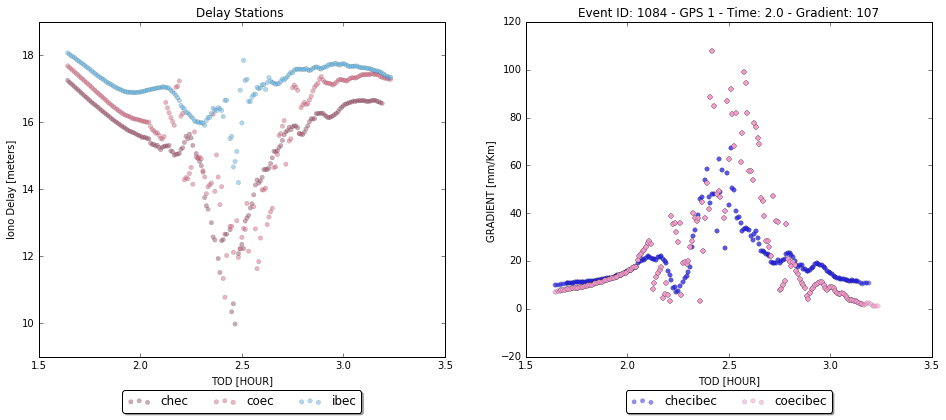

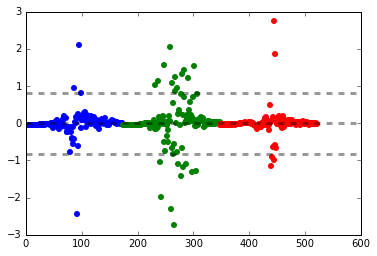

In [101]:
inspect_event(event, curve, detail, 1084,  Plots_folder)

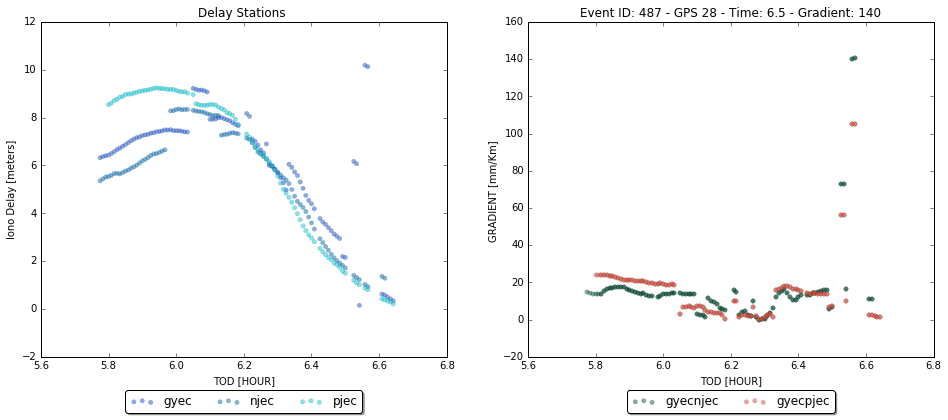

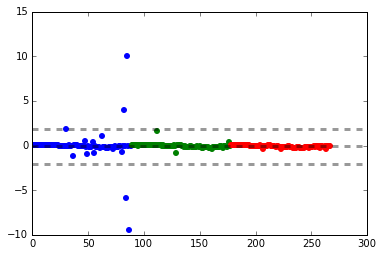

In [100]:
inspect_event(event, curve, detail, 487,  Plots_folder)

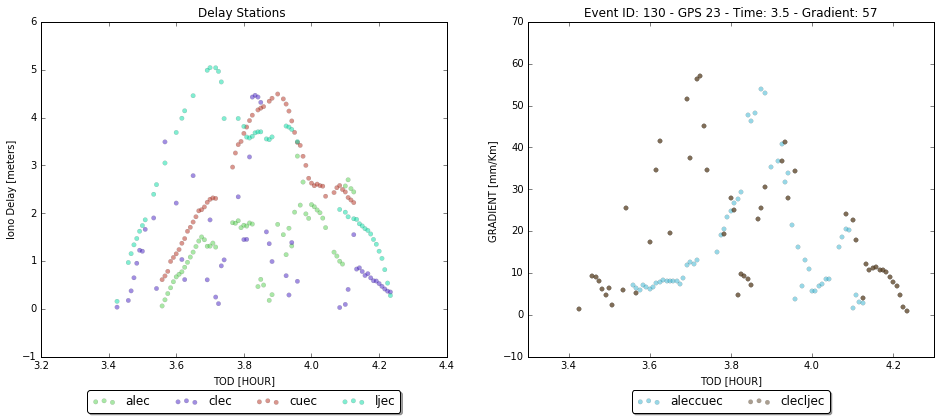

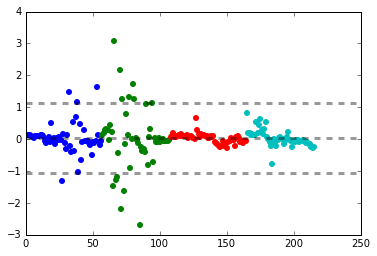

In [97]:
inspect_event(event, curve, detail, 130,  Plots_folder)

File not found /mnt/gnss/data/regme/Plots_regme/PlotsCorr2013/1020.png


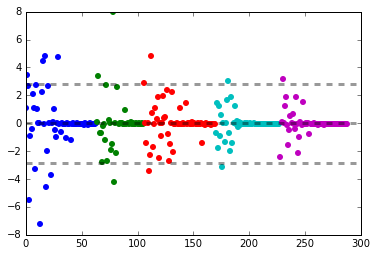

In [98]:
inspect_event(event, curve, detail, 1020,  Plots_folder)

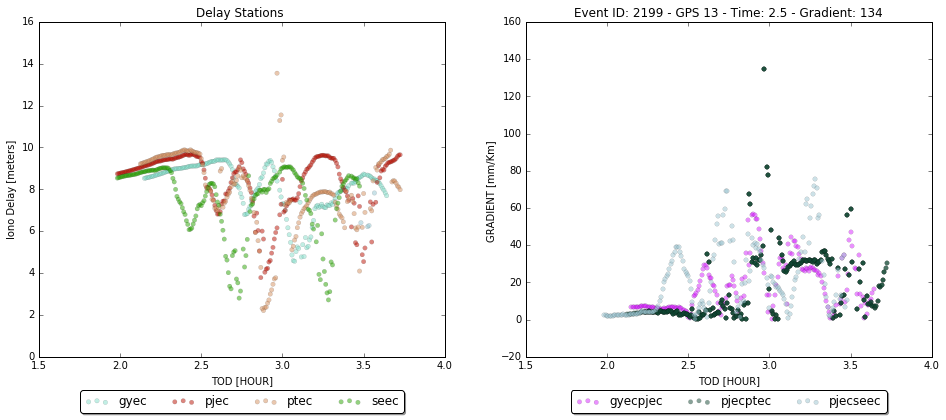

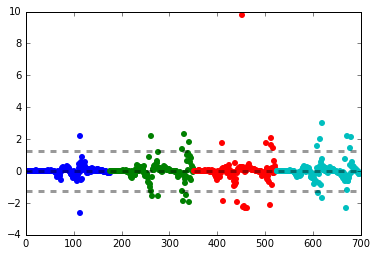

In [99]:
inspect_event(event, curve, detail, 2199,  Plots_folder)

## Training with time series data

In [ ]:
tdata = pd.DataFrame(np.column_stack((dataset["eid"],dataset[dataset.columns.difference(["eid","label"])],dataset["label"])))
tdata.dropna(axis=1,inplace=True)
ml_col = []
for col in tdata.columns:
    if tdata[col].std()==0: continue
    if ((col == "eid") | (col == "label")): continue
    ml_col += [col]
tdata = tdata[ml_col]
lr  = LogisticRegression()
gnb = GaussianNB()
svc = LinearSVC(C=1.0)
rfc = RandomForestClassifier(n_estimators=100)
models = [(lr,  "Logistic Regression", "lr"),            (gnb, "Naive Bayes", "gnb"),
          (svc, "Support Vector Classification", "svc"), (rfc, "Random Forest", "rfc")]
# Sample the dataset with replacement "n" times. Each time, 
# split train/test and generate all models. Stats are over the 
# n datasets
stats = get_classifier_stats(tdata, models, n=100)
stats_c3 = stats

In [54]:
stats

fp              fn                 fpr                  fnr  \
       mean       std  mean       std      mean       std       mean   
model                                                                  
gnb    2.61  1.669059  0.46  0.821676  2.915716  1.847702   1.606285   
lr     4.70  1.914854  3.22  2.101370  5.254936  2.135443  11.166298   
rfc    3.12  1.571720  2.30  1.800673  3.481323  1.741852   7.959280   
svc    4.31  1.673893  2.82  2.011984  4.814368  1.856230   9.798256   

                       pre                  sen                  spe            
            std       mean       std       mean       std       mean       std  
model                                                                           
gnb    2.938938  91.613731  5.199768  98.393715  2.938938  97.084284  1.847702  
lr     6.746006  84.414459  5.863504  88.833702  6.746006  94.745064  2.135443  
rfc    5.897590  89.365166  5.231077  92.040720  5.897590  96.518677  1.741852  
svc    6.469523  85.570464  5.496514  90.201744  6.469523  95.185632  1.856230

In [52]:
stats_mean = stats.ix[:,stats.columns.get_level_values(1).isin({"mean"})]
stats_std  = stats.ix[:,stats.columns.get_level_values(1).isin({"std"})]

feat2 = ["spe","sen","pre","fp","fn"]

m = stats_mean.index.values
xval = ["fpr","fnr"]
#xval = stats_mean.columns.levels[0].difference(feat2)
nx = range(len(xval)) 
layout = go.Layout(width=600,height=300,xaxis=go.XAxis(ticktext=xval, tickvals = nx + .2*np.ones(len(xval))))
yval = stats_mean[xval].as_matrix()
error_y = stats_std[xval].as_matrix()
pdata =  [ go.Scatter(x= np.array(nx) + 0.1*i, y=yval[i,:], 
                     error_y=dict(type='data',array=error_y[i,:],visible=True),
                     name=m[i], mode="markers") 
         for i in range(yval.shape[0])]


iplot(go.Figure(data=pdata, layout=layout)) 

In [78]:
from sklearn.svm import SVC
lr  = LogisticRegression()
gnb = GaussianNB()
lsvc = LinearSVC(C=1.0)
rfc = RandomForestClassifier(n_estimators=100)
svc = SVC(gamma=0.001)
models = [(lr,  "Logistic Regression", "lr"), 
          (gnb, "Naive Bayes", "gnb"),
          (lsvc, "Linear SVC", "lsvc"),
          (svc, "SVC", "svc"),
          (rfc, "Random Forest", "rfc")]

stats = get_classifier_stats(tdata, models, n=100)


Dataset size: train: 274 , test: 118
Progress %: 0 10 20 30 40 50 60 70 80 90


In [79]:
stats

fp              fn                 fpr                  fnr  \
       mean       std  mean       std      mean       std       mean   
model                                                                  
gnb    2.59  1.723838  0.29  0.686007  2.928252  1.962195   0.945944   
lr     4.69  1.679917  2.99  2.012562  5.298566  1.925222  10.133892   
lsvc   4.24  1.583501  2.70  1.966898  4.783320  1.789007   9.161064   
rfc    2.99  1.507523  2.21  1.754043  3.375623  1.700623   7.397061   
svc    5.35  1.719614  4.82  2.138535  6.039453  1.939372  16.334012   

                       pre                  sen                  spe            
            std       mean       std       mean       std       mean       std  
model                                                                           
gnb    2.254330  91.981651  4.852859  99.054056  2.254330  97.071748  1.962195  
lr     6.650442  84.954947  4.692954  89.866108  6.650442  94.701434  1.925222  
lsvc   6.462728  86.249212  4.741119  90.838936  6.462728  95.216680  1.789007  
rfc    5.722619  90.169131  4.683493  92.602939  5.722619  96.624377  1.700623  
svc    6.913101  82.132401  5.184045  83.665988  6.913101  93.960547  1.939372

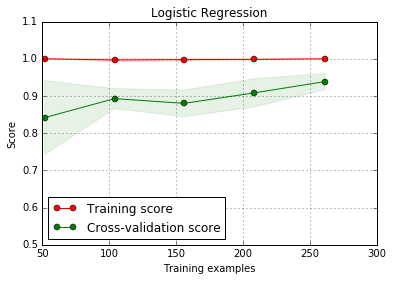

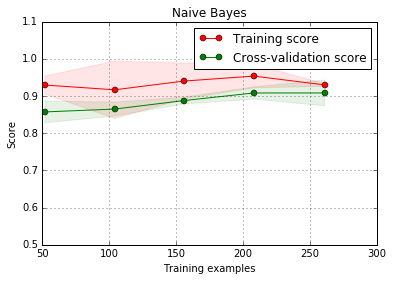

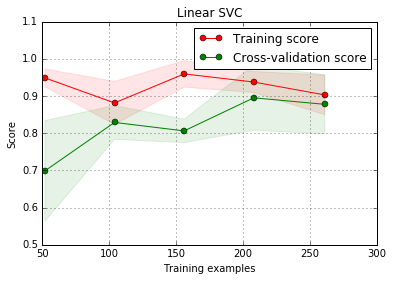

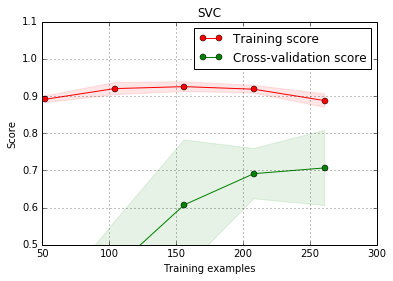

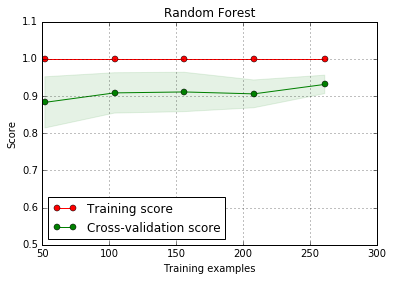

In [81]:
from sklearn.model_selection import learning_curve
X = (tdata.as_matrix())[:,1:-1]
y = (tdata.as_matrix())[:,-1]

for model, name, label in models:
    plot_learning_curve(model, name, X, y, cv=3, n_jobs=1, train_sizes=np.linspace(.2, 1.0, 5), ylim=(.5,1.1))
    plt.show()


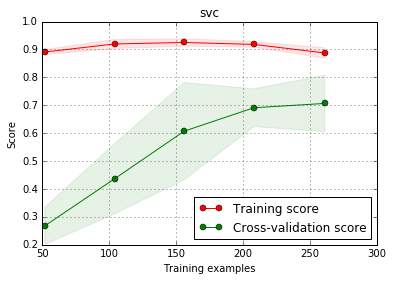

In [85]:
plot_learning_curve(svc, "svc", X, y, cv=3, n_jobs=1, train_sizes=np.linspace(.2, 1.0, 5))
plt.show()

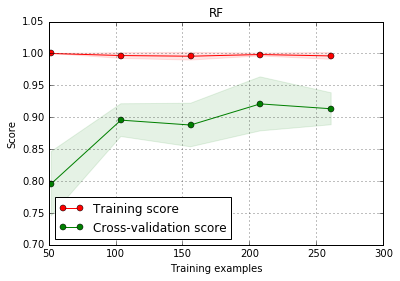

In [89]:
plot_learning_curve(RandomForestClassifier(n_estimators=10), "RF", X, y, cv=3, n_jobs=1, 
                    train_sizes=np.linspace(.2, 1.0, 5))
plt.show()


# Training with 1000 images

In [96]:
init_notebook_mode()

In [2]:
from plotly.offline import init_notebook_mode
from descriptors import *
from utils_ml import *
init_notebook_mode()
%matplotlib inline
%load_ext autoreload
%autoreload 2

/usr/local/lib/python2.7/dist-packages/sklearn/cross_validation.py:44: DeprecationWarning:

This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.



In [3]:
%autoreload 2
from utils_ml import *
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from sklearn.pipeline import make_pipeline
#from sklearn.ensemble import VotingClassifier
#from sklearn.calibration import calibration_curve

In [4]:
year = 2013
Plots_folder = "/mnt/gnss/data/regme/Plots_regme/PlotsCorr"+str(year)
hdf = HDFStore('/mnt/gnss/data/regme/gradients/data2013.h5')
event  = hdf["event"]
curve  = hdf["gradient"]
detail = hdf["detail"]
hdf.close()

In [5]:
event.shape, curve.shape, detail.shape

((6529, 14), (81603, 15), (9242323, 14))

In [6]:
#ev_class = pd.read_csv("data/ev_types.csv")
ev_class = pd.read_csv("data/event_classes_Oct26.csv")
print ev_class.shape
ev_class.head()

(954, 3)


eid valid_event  scint
0    0       False  False
1    3       False  False
2    4       False  False
3    5       False  False
4    6       False  False

In [7]:
print time.ctime()
start = time.time()
data = []
ts_data = []
df = {}
ad = {}
ts = {}
sm = {}
columns = ["d_max","n_out_ma","n_out_pf","i_range","d_outliers","d_outliers_bin"]
max_len = 20*len(columns)*23 # Max number of stations * Number of descriptors * Time slots
for i, plot in ev_class.iterrows():
    print "event id:", plot.eid, ", is valid:", plot.valid_event
    res = analyze_set(event, curve, detail, plot.eid, Plots_folder, tw = 6, plot=False)
    df[i],ts[i],sm[i],ad[i] = res[0], res[1], res[2], res[4]
    data.append( list([plot.eid]) + list(ad[i].values.flatten()) + list([plot.valid_event]) )
    ts_row = []
    for j, st in enumerate(ts[i].station.unique()):
        if j>19:
            print "Exceeded number of stations for event"
            continue
        for column in columns:
            st_col_data = (ts[i])[(ts[i]).station==st][column]
            ts_row += list(st_col_data.values.flatten())
    if len(ts_row)<max_len:
        ts_row = ts_row + [0]*(max_len - len(ts_row))
    ts_data.append( list([plot.eid]) + ts_row + list([plot.valid_event]) )

data = np.array(data)
ts_data = np.array(ts_data)

columns = list(["eid"]) + list(ad[0].columns) + list(["label"])
data = pd.DataFrame(data,columns=columns)
end = time.time()
print end - start

Wed Oct 26 14:13:31 2016
event id: 0 , is valid: False
event id: 3 , is valid: False
event id: 4 , is valid: False
event id: 5 , is valid: False
event id: 6 , is valid: False
event id: 7 , is valid: False
event id: 8 , is valid: False
event id: 10 , is valid: False
event id: 12 , is valid: True
event id: 13 , is valid: True
event id: 16 , is valid: False
event id: 17 , is valid: False
event id: 18 , is valid: False
event id: 20 , is valid: False
event id: 21 , is valid: False
event id: 22 , is valid: False
event id: 23 , is valid: False
event id: 24 , is valid: False
event id: 25 , is valid: False
event id: 26 , is valid: False
event id: 27 , is valid: False
event id: 28 , is valid: False
event id: 29 , is valid: False
event id: 30 , is valid: False
event id: 31 , is valid: False
event id: 32 , is valid: False
event id: 33 , is valid: False
event id: 35 , is valid: False
event id: 36 , is valid: False
event id: 37 , is valid: False
event id: 38 , is valid: False
event id: 39 , is valid

In [42]:
data.shape, ts_data.shape

((953, 25), (954,))

In [9]:
ts_data = np.array(ts_data)
tsv = np.zeros((0,len(ts_data[0])))
lon = len(ts_data[0])
c=0
for row in ts_data:
    if len(row) <> lon:
        continue
    lon = len(row)
    tsv = np.vstack((tsv,row))
    c+=1
tsv = pd.DataFrame(tsv)
tsv.dropna(axis=1,inplace=True)
tsv.shape

(953, 2099)

In [11]:
data = data.drop_duplicates()
tsv = tsv.drop_duplicates()
data.shape, tsv.shape

((953, 25), (952, 2099))

In [12]:
dataset = data.merge(tsv,left_on=["eid"],right_on=[0],how="inner")
tsv.shape, data.shape, dataset.shape

((952, 2099), (953, 25), (952, 2124))

In [13]:
data.to_csv("data/descriptors1.csv")
tsv.to_csv("data/descriptors2.csv")
dataset.to_csv("data/descriptors3.csv")


In [22]:
tsv.shape, data.shape, dataset.shape

((952, 2099), (953, 25), (952, 2124))

In [68]:
from sklearn.svm import SVC
lr  = LogisticRegression()
gnb = GaussianNB()
lsvc = LinearSVC(C=1.0)
rfc = RandomForestClassifier(n_estimators=100)
svc = SVC(gamma=0.001)
models = [(lr,  "Logistic Regression", "lr"), 
          (gnb, "Naive Bayes", "gnb"),
          (lsvc, "Linear SVC", "lsvc"),
          (svc, "SVC", "svc"),
          (rfc, "Random Forest", "rfc")]


In [108]:
tdata = pd.DataFrame(np.column_stack((dataset["eid"],dataset[dataset.columns.difference(["eid","label"])],dataset["label"])))

tdata.dropna(axis=1,inplace=True)

ml_col = []
for col in tdata.columns:
    if tdata[col].std()==0: continue
#    if ((col == "eid") | (col == "label")): continue
    ml_col += [col]
#ml_col += ["label"]
tdata = tdata[ml_col]

stats = get_classifier_stats(tdata, models, n=100)
stats_c3 = stats
stats

 Dataset size: train: 666 , test: 286
Progress %: 0 10 20 30 40 50 60 70 80 90

fp               fn                 fpr                  fnr  \
        mean       std   mean       std      mean       std       mean   
model                                                                    
gnb     3.62  1.963197   1.80  1.543968  1.464993  0.795914   4.647327   
lr      8.23  2.620259   1.80  1.428427  3.328833  1.058345   4.743982   
lsvc    6.88  2.567395   0.65  0.880484  2.785324  1.044670   1.713982   
rfc     6.83  2.737893   5.51  2.808699  2.760194  1.099512  14.070663   
svc    11.18  2.854661  10.81  2.963396  4.520673  1.149337  27.971045   

                       pre                  sen                  spe            
            std       mean       std       mean       std       mean       std  
model                                                                           
gnb    3.902116  91.216874  4.340138  95.352673  3.902116  98.535007  0.795914  
lr     3.872750  81.816459  5.090573  95.256018  3.872750  96.671167  1.058345  
lsvc   2.389581  84.840933  4.879591  98.286018  2.389581  97.214676  1.044670  
rfc    6.526536  83.085131  6.081564  85.929337  6.526536  97.239806  1.099512  
svc    6.960728  71.363082  6.078950  72.028955  6.960728  95.479327  1.149337

In [109]:
stats = stats_c3.copy()
stats_mean = stats.ix[:,stats.columns.get_level_values(1).isin({"mean"})]
stats_std  = stats.ix[:,stats.columns.get_level_values(1).isin({"std"})]

feat2 = ["spe","sen","pre","fp","fn"]

m = stats_mean.index.values
xval = ["fpr","fnr"]
#xval = stats_mean.columns.levels[0].difference(feat2)
nx = range(len(xval)) 
nx = [0,0.5]
xticks = [str.upper(i) for i in xval]
layout = go.Layout(width=600,height=300,xaxis=go.XAxis(ticktext=xticks, tickvals = nx + .12*np.ones(len(xval))))
yval = stats_mean[xval].as_matrix()
error_y = stats_std[xval].as_matrix()
pdata =  [ go.Scatter(x= np.array(nx) + 0.08*i, y=yval[i,:], 
                     error_y=dict(type='data',array=error_y[i,:],visible=True),
                     name=m[i], mode="markers") 
         for i in range(yval.shape[0])]


iplot(go.Figure(data=pdata, layout=layout))  

In [110]:
tdata = pd.DataFrame(np.column_stack((data["eid"],data[data.columns.difference(["eid","label"])],data["label"])))
#tdata.dropna(axis=1,inplace=True)
tdata.fillna(value=0,inplace=True)

ml_col = []
for col in tdata.columns:
    if tdata[col].std()==0: continue
#    if ((col == "eid") | (col == "label")): continue
    ml_col += [col]
#ml_col += ["label"]

tdata = tdata[ml_col]

stats = get_classifier_stats(tdata, models, n=100)
stats_c1 = stats
stats

Dataset size: train: 667 , test: 286
Progress %: 0 10 20 30 40 50 60 70 80 90

fp               fn                  fpr                  fnr  \
        mean       std   mean       std       mean       std       mean   
model                                                                     
gnb    27.02  3.719944   0.59  0.604612  10.969826  1.519685   1.485648   
lr      8.64  2.668636  11.61  3.193728   3.502874  1.065430  29.287006   
lsvc    8.99  2.739516  12.19  3.205724   3.644406  1.093111  30.740251   
rfc    11.21  2.753492  10.61  3.113655   4.547712  1.107248  26.734562   
svc     3.90  1.732051  22.10  4.368158   1.581283  0.697017  55.590958   

                       pre                  sen                  spe            
            std       mean       std       mean       std       mean       std  
model                                                                           
gnb    1.516383  59.062641  4.507239  98.514352  1.516383  89.030174  1.519685  
lr     7.161439  76.447720  6.663029  70.712994  7.161439  96.497126  1.065430  
lsvc   7.069529  75.343295  6.944788  69.259749  7.069529  96.355594  1.093111  
rfc    6.986084  72.143957  6.116866  73.265438  6.986084  95.452288  1.107248  
svc    7.325409  81.895857  7.494555  44.409042  7.325409  98.418717  0.697017

In [ ]:
stats = stats_c1.copy()
stats_mean = stats.ix[:,stats.columns.get_level_values(1).isin({"mean"})]
stats_std  = stats.ix[:,stats.columns.get_level_values(1).isin({"std"})]

feat2 = ["spe","sen","pre","fp","fn"]

m = stats_mean.index.values
xval = ["fpr","fnr"]
#xval = stats_mean.columns.levels[0].difference(feat2)
nx = range(len(xval)) 
nx = [0,0.5]
xticks = [str.upper(i) for i in xval]
layout = go.Layout(width=600,height=300,xaxis=go.XAxis(ticktext=xticks, tickvals = nx + .12*np.ones(len(xval))))
yval = stats_mean[xval].as_matrix()
error_y = stats_std[xval].as_matrix()
pdata =  [ go.Scatter(x= np.array(nx) + 0.08*i, y=yval[i,:], 
                     error_y=dict(type='data',array=error_y[i,:],visible=True),
                     name=m[i], mode="markers") 
         for i in range(yval.shape[0])]


iplot(go.Figure(data=pdata, layout=layout))  

In [102]:
tdata = pd.DataFrame(np.column_stack((dataset["eid"],dataset[dataset.columns.difference(["eid","label"])],dataset["label"])))

tdata.dropna(axis=1,inplace=True)

ml_col = []
for col in tdata.columns:
    if tdata[col].std()==0: continue
#    if ((col == "eid") | (col == "label")): continue
    ml_col += [col]
#ml_col += ["label"]
tdata = tdata[ml_col]

In [104]:
from sklearn.model_selection import learning_curve

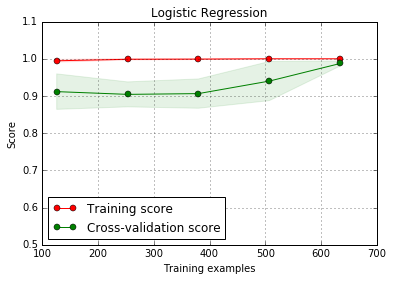

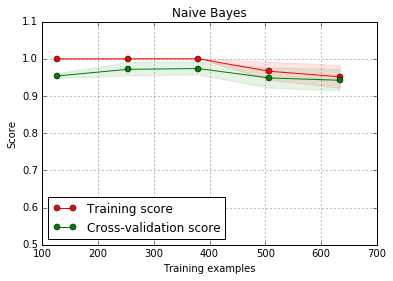

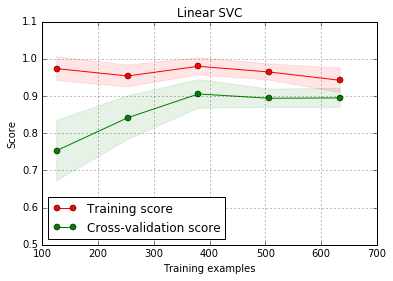

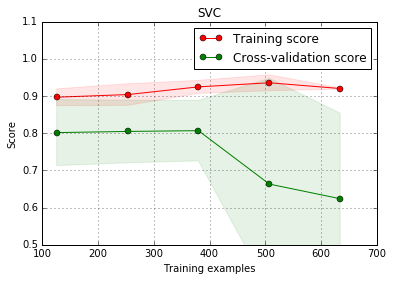

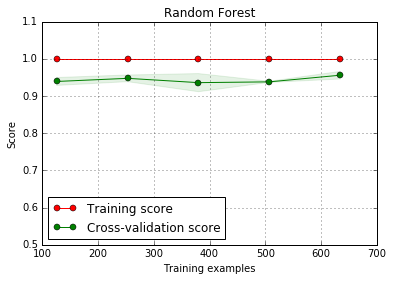

In [106]:
X = (tdata.as_matrix())[:,1:-1]
y = (tdata.as_matrix())[:,-1]

for model, name, label in models:
    plot_learning_curve(model, name, X, y, cv=3, n_jobs=1, train_sizes=np.linspace(.2, 1.0, 5), ylim=(.5,1.1))
    plt.show()
